#**Tugas 1**
##**Eksplorasi Hyperparameter CNN dengan menggunakan dataset Cifar10** 
Referensi dasar menggunakan materi MIT dengan judul introduction to deep learning dengan perubahan dalam ekspolorasi dataset, hyperparameter dan visualisasi data hasil analisis dan prediksi


In [24]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf
import os

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
!pip install pyyaml h5py
# melakukan pegecekan GPU jika tidak terdeteksi maka akan dilakukan perubahan runtime
assert len(tf.config.list_physical_devices('GPU')) > 0

**DATASET CIFAR10**
 merupakan kumpulan data gambar dengan ukuran 32x32 piksel, CIFAR10 memiliki 60,000 data dan terdiri dari 10 kelas data, yaitu 0-airplane, 1-automobile, 2-bird, 3-cat, 4-deer, 5-dog, 6-frog, 7-horse, 8-ship, 9-truck.
 Dataset yang digunakan merupakan dataset yang disediakan oleh Api keras.datasets

In [165]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalisasi nilai piksel warna kedalam range 0..1
train_images, test_images = train_images / 255.0, test_images / 255.0

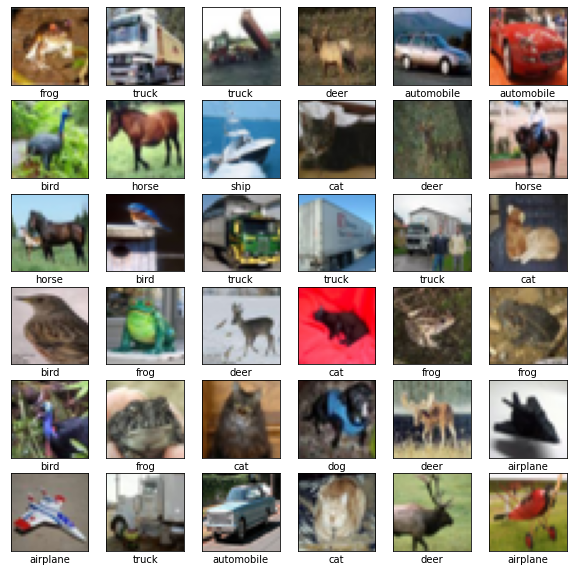

In [166]:
#membuat Array nama kelas CIFAR
class_names = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])
#menampilkan data cifar10 sebanyak 36 data 
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Arsitektur mengacu kepada arsitektur VGG dengan 2 hidden layer yang sama selanjutnya dilakukan pooling data, setelah penggabungan data piksel dilakukan dropout sebesar 50% diharapkan dapat meningkatkan val_loss.

In [167]:
from tensorflow.python.ops.nn_ops import dropout
#membangun arsitektur CNN dengan 2 layer konvolusi
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # Layer konvolusi 1 dengan data input 32 x 32
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
        #layer konvolusi 2
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
        #Pendefenisian Max pooling 2
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),

        # Layer konvolusi 3
        tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
        # Layer konvolusi 4
        tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
        #Pendefenisian Max pooling 2
        tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),

        #flatten layer
        tf.keras.layers.Flatten(),
        #penambahan dropout sebesar 50 persen
        tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None),
         # mendefenisikan dense layer dengan melakukan aktivasi fugsi RelU 
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        # output dengan melakukan aktifasi fungsi softmax
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
#inisialisasi model dengan melewatkan data kedalam parameter fungsi
cnn_model.predict(train_images[[0]])
# sumary layer dari model yang didefenisikan
print(cnn_model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_67 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

In [168]:
# hasil sheckpoin setiap proses epoch akan disimpan dalam training_1/cp.ckpt
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# menambahkan fungsi callback untuk menyimpan weight model
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [171]:
#melakukan compile dengan menggunakan Optimizer Adan dan learning rate=0.001
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [172]:
BATCH_SIZE = 128
EPOCHS = 50

# model.fit melakukan training terhadap model, dengan jumlah batch 128 dan epoch sebesar 15
hasil=cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(test_images, test_labels),callbacks=[cp_callback])
cnn_model.save('modelAdam')

Epoch 1/50
385/391 [============================>.] - ETA: 0s - loss: 1.5197 - accuracy: 0.4504
Epoch 1: saving model to training_1/cp.ckpt
391/391 [==============================] - 4s 9ms/step - loss: 1.5161 - accuracy: 0.4517 - val_loss: 1.2110 - val_accuracy: 0.5667
Epoch 2/50
391/391 [==============================] - ETA: 0s - loss: 1.1065 - accuracy: 0.6088
Epoch 2: saving model to training_1/cp.ckpt
391/391 [==============================] - 3s 8ms/step - loss: 1.1065 - accuracy: 0.6088 - val_loss: 0.9388 - val_accuracy: 0.6723
Epoch 3/50
390/391 [============================>.] - ETA: 0s - loss: 0.9352 - accuracy: 0.6681
Epoch 3: saving model to training_1/cp.ckpt
391/391 [==============================] - 3s 8ms/step - loss: 0.9349 - accuracy: 0.6682 - val_loss: 0.8689 - val_accuracy: 0.6950
Epoch 4/50
386/391 [============================>.] - ETA: 0s - loss: 0.8252 - accuracy: 0.7109
Epoch 4: saving model to training_1/cp.ckpt
391/391 [==============================] - 3s 8

In [173]:
#menerapkan model kedalam data test
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8723 - accuracy: 0.7990
Test accuracy: 0.7990000247955322


313/313 - 1s - loss: 0.8723 - accuracy: 0.7990 - 736ms/epoch - 2ms/step


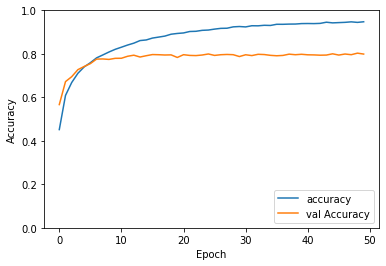

In [175]:
#Visualisasi hasil evaluasi model
plt.plot(hasil.history['accuracy'], label='accuracy')
plt.plot(hasil.history['val_accuracy'], label = 'val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)


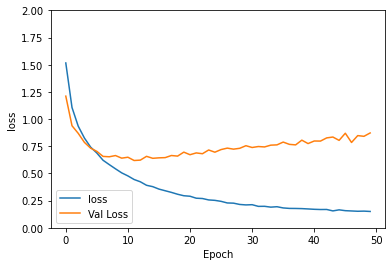

In [176]:
plt.plot(hasil.history['loss'], label='loss')
plt.plot(hasil.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 2])
plt.legend(loc='lower left')

#**Test Model**
##Melakukan testing terhadap model yang dihasilkan dengan data test CIFAR10

In [177]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(type(x_test))
print(type(y_test[0]))

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


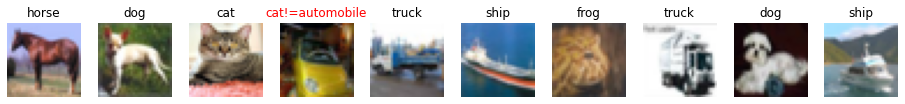

Jumlah Prediksi benar: 9
Jumlah Prediksi Salah: 1
Rata-rata jawaban benar: 90.0 %


In [179]:
def convertData(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

plt.figure(figsize=(16,16))

benar = 0
salah = 0
#dilakukan test terhadap n image yang diambil secara random
for i in range(10):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertData(image)
    #jumlah subplot 10 x 10 untuk maksimal 100 data jika lebih maka subplot harus ditambahkan
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')
    #melakukan prediksi menggunakan weight dari cnn_,model
    ret = cnn_model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(class_names[bestclass])
        benar += 1
    else:
        plt.title(class_names[bestclass] + "!=" + class_names[y_test[index][0]], color='#ff0000')
        salah += 1
                                                                   
plt.show()
print("Jumlah Prediksi benar:", benar)
print("Jumlah Prediksi Salah:", salah)
print("Rata-rata jawaban benar:", benar/(salah + benar)*100, '%')

perlu dilakukan augmentasi data gambar untuk data-data gambar yang memiliki fitur mirip atau gambar tidak jelas